# Churn Prediction 

## Library yang digunakan

In [52]:
# lib untuk data analisis
import pandas as pd
import numpy as np

#lib untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Description

- Dataset dalam bentuk csv format <br>
- Jumlah baris 6.950 dan kolom 13 <br>
- Tidak ada missing values <br>
- Churn variable sebeagai target variable<br>
- Untuk detil datanya adalah sebagai berikut:
> `UpdatedAt` Periode of Data taken <br>
> `customerID` Customer ID <br>
> `gender` Whether the customer is a male or a female (Male, Female) <br>
> `SeniorCitizen` Whether the customer is a senior citizen or not (Yes, No)<br>
> `Partner` Whether the customer has a partner or not (Yes, No)<br>
> `tenure` Number of months the customer has stayed with the company<br>
> `PhoneService` Whether the customer has a phone service or not (Yes, No)<br>
> `InternetService` Customer’s internet service provider (Yes, No)<br>
> `StreamingTV` Whether the customer has streaming TV or not (Yes, No)<br>
> `PaperlessBilling` Whether the customer has paperless billing or not (Yes, No)<br>
> `MonthlyCharges` The amount charged to the customer monthly<br>
> `TotalCharges` The total amount charged to the customer<br>
> `Churn` Whether the customer churned or not (Yes, No)<br>



## Data Exploration

In [72]:
df = pd.read_csv('churn_telco.csv')

In [73]:
df.shape

(6950, 13)

In [74]:
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [75]:
df['customerID'].nunique()

6950

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


### Rasio jumlah customer yang churn dan tidak churn

In [77]:
df.Churn.value_counts()

No     5114
Yes    1836
Name: Churn, dtype: int64

In [78]:
df.Churn.value_counts(normalize =True) * 100

No     73.582734
Yes    26.417266
Name: Churn, dtype: float64

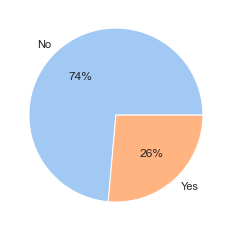

In [79]:
churn  = df.Churn.value_counts()
labels = list(churn.index)
data   = list(churn.values) 

#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Analisa numerical variables terhadap churn

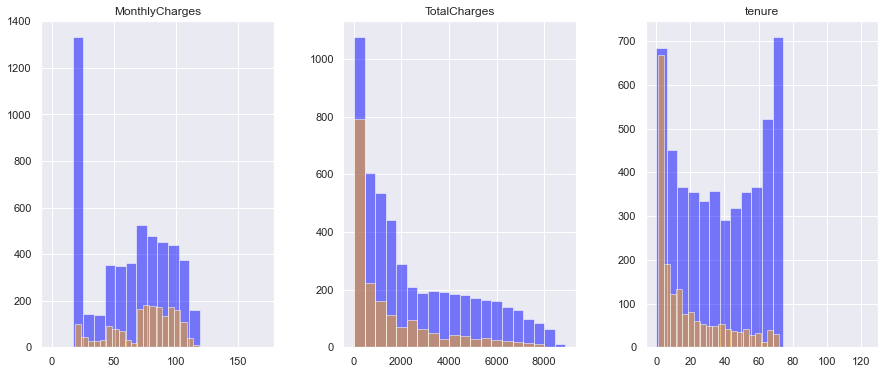

In [80]:
#creating bin in chart
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure'] 
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df[df.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

- Dapat kita ketahui bahwa untuk `MonthlyCharges` ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan `Churn`. 
- Untuk `TotalCharges` terlihat tidak ada kecenderungan apapun terhadap Churn customers. Untuk `tenure` ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan `Churn`.

### Analisa categorical variables terhadap churn

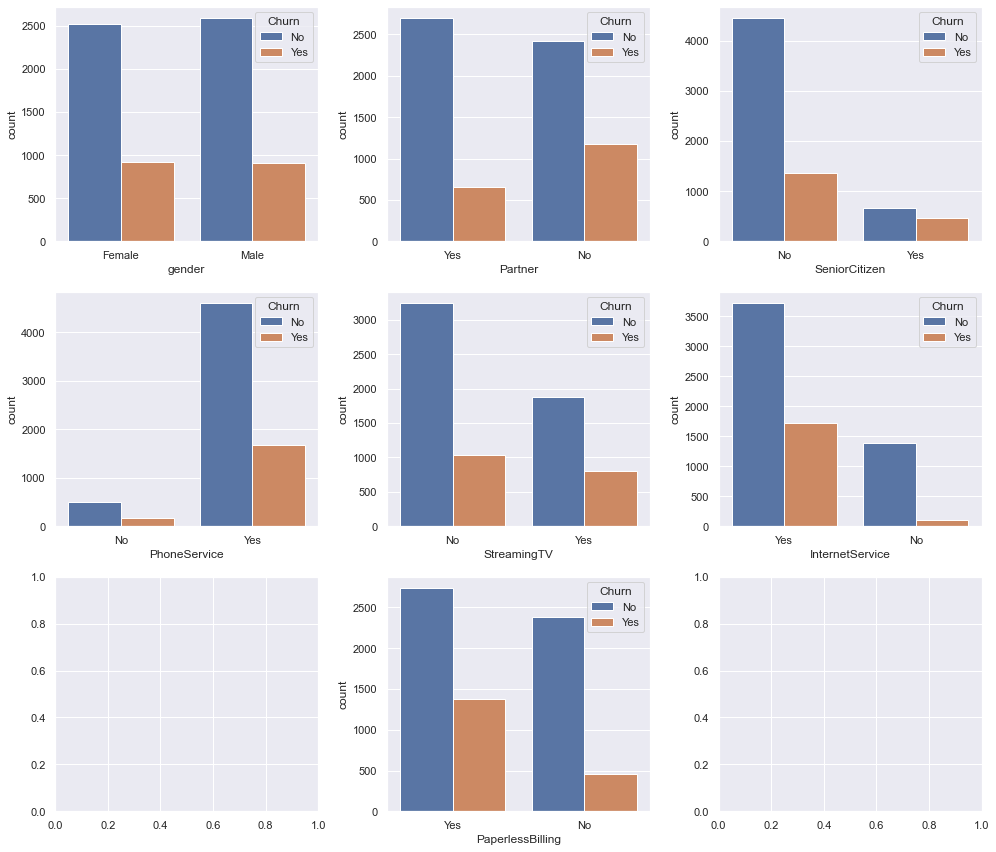

In [81]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

In [82]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

print("===Churn Rate by Gender===")
print(df.groupby('gender')['Churn'].mean())
print("\n")

print("===Churn Rate by Partner===")
print(df.groupby('Partner')['Churn'].mean())
print("\n")

print("===Churn Rate by Gender===")
print(df.groupby('gender')['Churn'].mean())
print("\n")

print("===Churn Rate by SeniorCitizen===")
print(df.groupby('SeniorCitizen')['Churn'].mean())
print("\n")

print("===Churn Rate by PhoneService===")
print(df.groupby('PhoneService')['Churn'].mean())
print("\n")

print("===Churn Rate by StreamingTV===")
print(df.groupby('StreamingTV')['Churn'].mean())
print("\n")

print("===Churn Rate by InternetService===")
print(df.groupby('InternetService')['Churn'].mean())
print("\n")

print("===Churn Rate by PaperlessBilling===")
print(df.groupby('PaperlessBilling')['Churn'].mean())
print("\n")

===Churn Rate by Gender===
gender
Female    0.267925
Male      0.260485
Name: Churn, dtype: float64


===Churn Rate by Partner===
Partner
No     0.327485
Yes    0.196487
Name: Churn, dtype: float64


===Churn Rate by Gender===
gender
Female    0.267925
Male      0.260485
Name: Churn, dtype: float64


===Churn Rate by SeniorCitizen===
SeniorCitizen
No     0.234971
Yes    0.414894
Name: Churn, dtype: float64


===Churn Rate by PhoneService===
PhoneService
No     0.245142
Yes    0.266200
Name: Churn, dtype: float64


===Churn Rate by StreamingTV===
StreamingTV
No     0.242113
Yes    0.299513
Name: Churn, dtype: float64


===Churn Rate by InternetService===
InternetService
No     0.073754
Yes    0.316804
Name: Churn, dtype: float64


===Churn Rate by PaperlessBilling===
PaperlessBilling
No     0.162200
Yes    0.334468
Name: Churn, dtype: float64




- Dapat kita ketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService). 
- Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).

## Data pre-processing

### Menghapus Unnecessary Columns dari data
Selanjutnya kita akan mengapus kolom yang tidak akan diikutsertakan dalam pemodelan, kemudian simpan dengan nama cleaned_df. Tampilkan 5 rows teratas nya.

Gunakan `drop()` untuk menghapus kolom dari suatu data

In [98]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df.drop(['customerID','UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,0
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,0
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,1
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,0
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,0


### Encoding Data
Gunakan data dari hasil dan analisa sebelumnya `cleaned_df`, untuk merubah value dari data yang masih berbentuk string untuk diubah ke dalam bentuk numeric menggunakan `LabelEncoder()`. Gunakan `describe()` untuk melihat deskripsi datanya.

In [100]:
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
	if cleaned_df[column].dtype == np.number: continue
	# Perform encoding for each non-numeric column
	cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

/var/folders/zj/49qhjy1s3h93wb3j3_v2d9700000gn/T/ipykernel_44850/1634581352.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue


## Splitting Dataset
> Gunakan data dari hasil dan analisa sebelumnya cleaned_df, untuk dibagi datasetnya menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (Y). Gunakan train_test_split() untuk membagi data tersebut. Sertakan value_counts untuk mengecek apakah pembagian sudah sama proporsinya. Simpan hasil spliting data menjadi x_train, y_train, x_test & y_test

In [101]:
from sklearn.model_selection import train_test_split
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))

print('\nJumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.735868
1    0.264132
Name: Churn, dtype: float64

Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.735731
1    0.264269
Name: Churn, dtype: float64


## Built machine learning model

- Selanjutnya kita akan membuat model dengan menggunakan Algoritma Logistic Regression.
- Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.
- Gunakan LogisticRegression() memanggil algoritma tersebut, fit ke data train dan simpan sebagai log_model

In [102]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train,y_train)

In [103]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1534
           1       0.63      0.50      0.56       551

    accuracy                           0.79      2085
   macro avg       0.73      0.70      0.71      2085
weighted avg       0.78      0.79      0.78      2085



In [108]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_test_pred)

In [123]:
print(cm)

[[1374  160]
 [ 277  274]]


In [124]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

In [125]:
print("True Postive :", TP)
print("True Negative :", TN)
print("False Postive :", FP)
print("False Negative :", FN)

True Postive : 274
True Negative : 1374
False Postive : 160
False Negative : 277


> - True postive : customers yang di prediksi akan churn dan secara actual mereka churn
> - True negative : customers yang di prediksi tidak akan churn dan secara actual mareka tidak churn
> - False Positive : customers yang di prediksi akan churn ternyata mereka actualnya tidak churn
> - False Negative : customers yang di prediksi tidak akan churn ternyata meeka actualnya churn